# **Data Analysis using Numpy, Pandas and Seaborn:**

In this first part of the project we will be using Numpy, Pandas and Seaborn to find ome insights about the dataset.

## **DataSet that We will be using:**

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

In [3]:
## THESE LINES OF CODE LETS US UPLOAD ANY FILE ON THE COLAB NOTEBOOK AND STORE THE FILE CONTENT IN A VARIABLE

from google.colab import files
files.upload()   # Upload the hour.csv file

print("FILES READING COMPLETE")

MessageError: ignored

In [4]:
#IMPORTING REQUIRED LIBERARIES

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In machine learning you will most likely use databases from many sources to train your learning algorithms. Pandas allows us to load databases of different formats into DataFrames. One of the most popular data formats used to store databases is csv. CSV stands for Comma Separated Values and offers a simple format to store data. We can load CSV files into Pandas DataFrames using the ```pd.read_csv()``` function.

In [5]:
# Reading and converting the files into the Pandas DataFrame

rides = pd.DataFrame(pd.read_csv('hour.csv'))
rides.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


## **Attribute Information:**

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv 

- instant: record index 
- dteday : date 
- season : season (1:winter, 2:spring, 3:summer, 4:fall) 
- yr : year (0: 2011, 1:2012) 
- mnth : month ( 1 to 12) 
- hr : hour (0 to 23) 
- holiday : weather day is holiday or not (extracted from [Web Link]) 
- weekday : day of the week 
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0. 
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale) 
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) 
- hum: Normalized humidity. The values are divided to 100 (max) 
- windspeed: Normalized wind speed. The values are divided to 67 (max) 
- casual: count of casual users 
- registered: count of registered users 
- cnt: count of total rental bikes including both casual and registered 

We see that we have loaded the hour.csv file into a Pandas DataFrame and it consists of 17,379 rows and 17 columns.

In [6]:
rides.shape

(17379, 17)

```columns.unique()``` will return to us the no of unique columns in the data frame.

In [7]:
rides.columns.unique()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Pandas ```dataframe.info()``` function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. To get a quick overview of the dataset we use the ```dataframe.info()``` function.

In [8]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
rides.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We see that it is quite a large dataset and that Pandas has automatically assigned numerical row indices to the DataFrame. Pandas also used the labels that appear in the data in the CSV file to assign the column labels.
When dealing with large datasets like this one, it is often useful just to take a look at the first few rows of data instead of the whole dataset. We can take a look at the first 5 rows of data using the ```.head()``` method, as shown below

In [10]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## **Why Learn Data Visualization?**
If you do any work with data, whether that be through business, machine learning, or artificial intelligence, you're going to want to know about how to put together visualizations. Visualizations serve two major purposes in the data analysis process.

First of all, visualizations can be used during your initial data exploration to help you make insights into your data. Visualizations can reveal patterns in the data that statistics alone might not provide. They can also provide an intuition about the structure of your data. In addition to answering your research questions, visualizations might promote new questions for further investigation.

Secondly, visualizations can help you convey your insights to others through explanatory plots. By generating new visualizations or polishing and refining the plots created during exploration, you can more easily show others what you found in your analysis. A good visualization can communicate your findings quickly and succinctly.


## **The Four Levels of Measurement:**
In order to choose an appropriate plot type or method of analysis for your data, you need to understand the types of data you have. One common method divides the data into four **levels of measurement**:

### Qualitative or categorical types (non-numeric types)
1. **Nominal data:** pure labels without inherent order (no label is intrinsically greater or less than any other).**eg:** Gender, Marital Status, Breakfast Items
2. **Ordinal data:** labels with an intrinsic order or ranking (comparison operations can be made between values, but the magnitude of differences are not be well-defined).**eg:**	Letter Grade, Survey Rating

### Quantitative or numeric types
3. **Interval data:** numeric values where absolute differences are meaningful (addition and subtraction operations can be made).
4. **Ratio data:** numeric values where relative differences are meaningful (multiplication and division operations can be made)

All quantitative-type variables also come in one of two varieties: **discrete and continuous.**

- **Discrete quantitative** variables can only take on a specific set values at some maximum level of precision.**eg:**Pages in a Book, Trees in Yard, Dogs at a Coffee Shop
- **Continuous quantitative** variables can (hypothetically) take on values to any level of precision.**eg:**Height, Age, Income


Distinguishing between continuous and discrete can be a little tricky – a rule of thumb is if there are few levels, and values can't be subdivided into further units, then it's discrete. Otherwise, it's continuous. If you have a scale that can only take natural number values between 1 and 5, that's discrete. A quantity that can be measured to two digits, e.g. 2.72, is best characterized as continuous, since we might hypothetically be able to measure to even more digits, e.g. 2.718. A tricky case like test scores measured between 0 and 100 can only be divided down to single integers, making it initially seem discrete. But since there are so many values, such a feature is usually considered as continuous.

When exploring your data, the most important thing to consider first is whether your data is qualitative or quantitative.

In future we will see how it changes our plots.


## **Bar Charts:**
A bar chart is used to depict the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level. A basic bar chart of frequencies can be created through the use of seaborn's countplot function:

In [11]:
rides.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

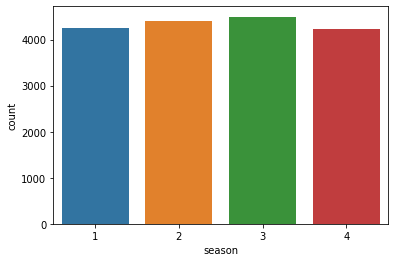

In [26]:
sb.countplot(x='season',data=rides);

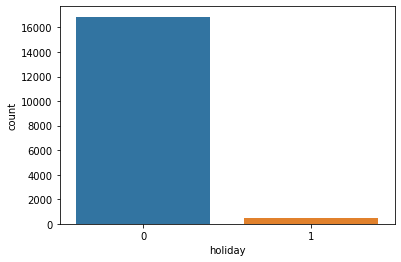

In [27]:
#holiday
rides.holiday.value_counts()
sb.countplot(x='holiday',data=rides) ;


# majority of data is for non holiday days.

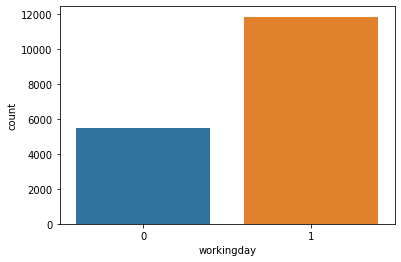

In [28]:
#holiday
rides.workingday.value_counts()
sb.countplot(x='workingday',data=rides) 

# majority of data is for working days.

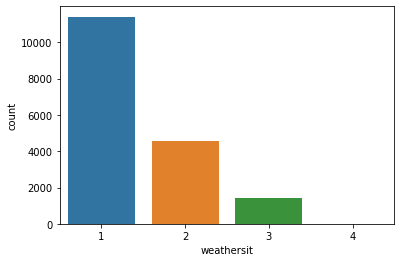

In [29]:
#weather
rides.weathersit.value_counts()
sb.countplot(x='weathersit',data=rides)  
# 1-> spring
# 2-> summer
# 3-> fall
# 4-> winter

In [16]:
rides.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## **What is a Boxplot?**
For some distributions/datasets, you will find that you need more information than the measures of central tendency (median, mean, and mode).

You need to have information on the variability or dispersion of the data. A boxplot is a graph that gives you a good indication of how the values in the data are spread out. Although boxplots may seem primitive in comparison to a histogram or density plot, they have the advantage of taking up less space, which is useful when comparing distributions between many groups or datasets.

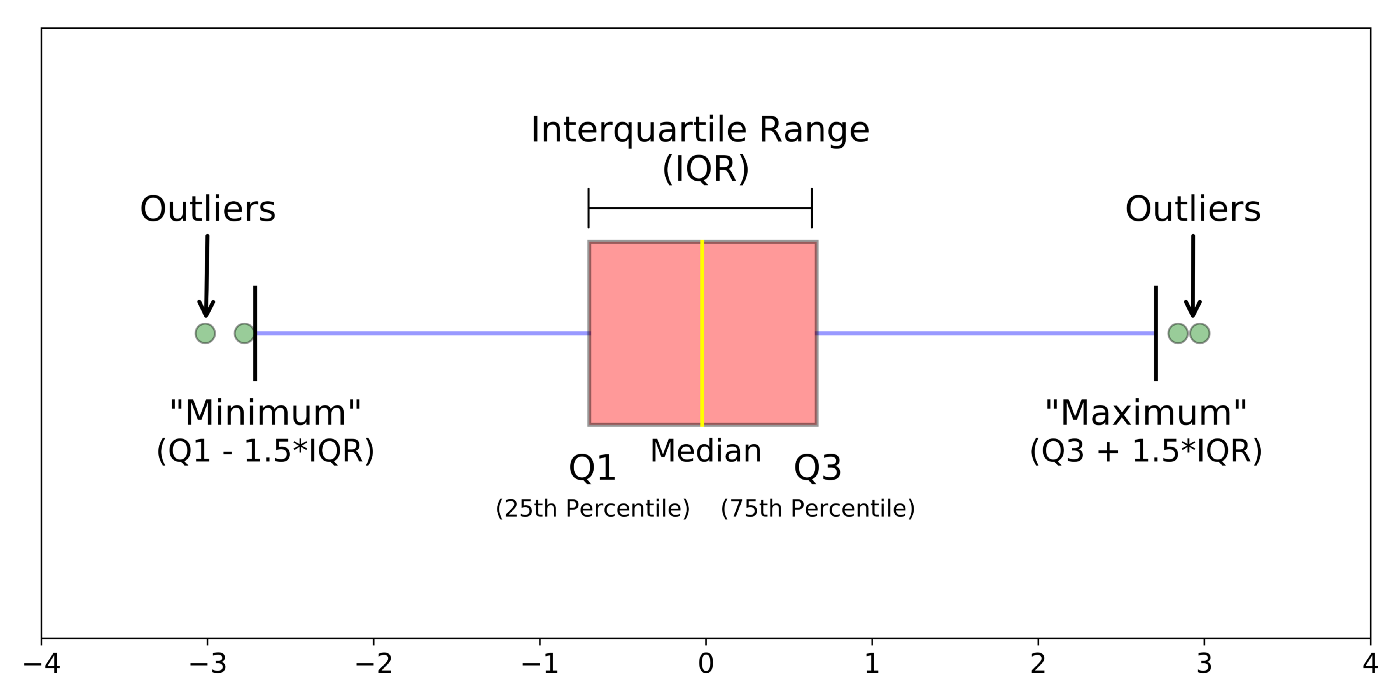

Boxplots are a standardized way of displaying the distribution of data based on a five number summary (
“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).


**median (Q2/50th Percentile):** the middle value of the dataset.


**first quartile (Q1/25th Percentile):** the middle number between the smallest number (not the “minimum”) and the median of the dataset.


**third quartile (Q3/75th Percentile):** the middle value between the median and the highest value (not the “maximum”) of the dataset.


**interquartile range (IQR):** 25th to the 75th percentile.


**whiskers (shown in blue)**


**outliers (shown as green circles)**


**“maximum”:** Q3 + 1.5*IQR

**“minimum”:** Q1 -1.5*IQR

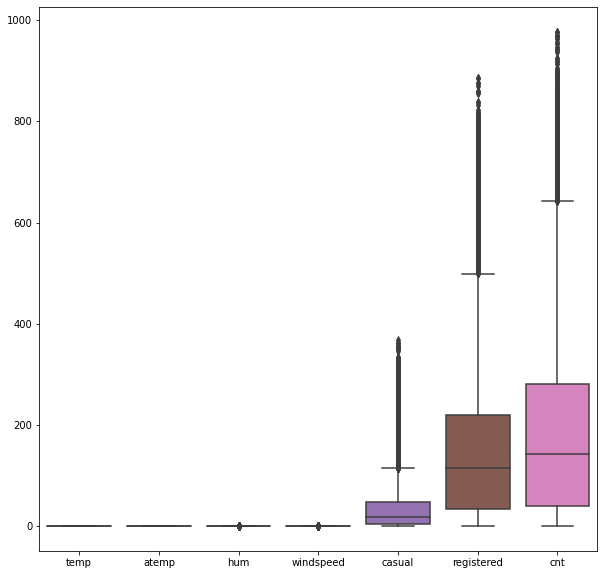

In [19]:
# just to visualize.
sb.boxplot(data=rides[['temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
fig=plt.gcf()
fig.set_size_inches(10,10)

## **Histograms:**

A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted depicting the number. For instance, using the default settings for matplotlib's hist function:

When creating histograms, it's useful to play around with different bin widths to see what represents the data best. Too many bins, and you may see too much noise that interferes with identification of the underlying signal. Too few bins, and you may not be able to see the true signal in the first place.


This example puts 4 plots side by side through use of the subplot function, whose arguments specify the number of rows, columns, and index of the active subplot (in that order). The figure() function is called with the "figsize" parameter so that we can have a larger figure to support having multiple subplots. (More details on figures and subplots are coming up next in the lesson.)

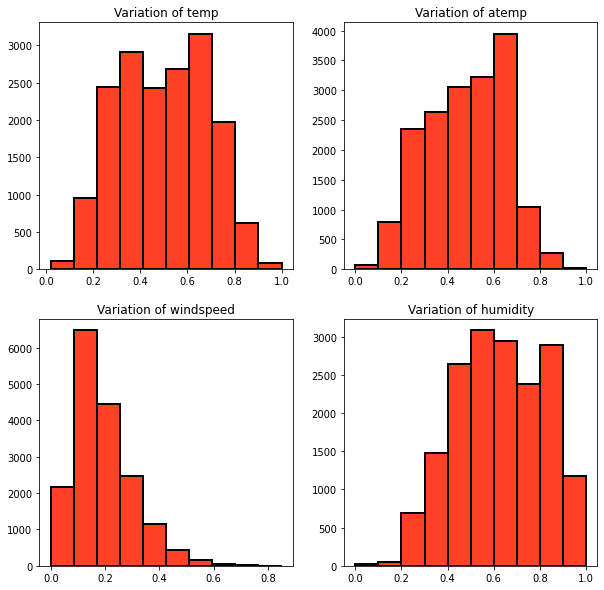

In [21]:
# can also be visulaized using histograms for all the continuous variables.
rides.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=rides,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=rides,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=rides,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="hum",data=rides,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

## **HeatMap / Correlation Matrix:**
You already know that if you have a data set with many columns, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.

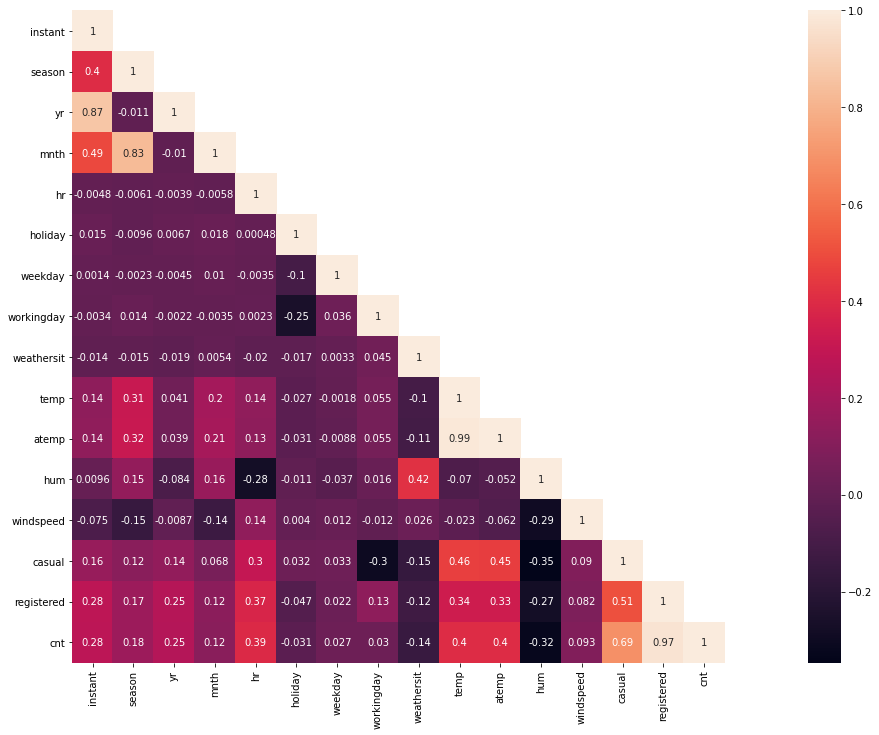

In [23]:
#corelation matrix.
cor_mat= rides[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sb.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

## **INFERENCES FROM THE ABOVE HEATMAP:**
1. self realtion i.e. of a feature to itself is equal to 1 as expected.

2. temp and atemp are highly related as expected.

3. humidity is inversely related to count as expected as the weather is humid people will not like to travel on a bike.

4. also note that casual and working day are highly inversely related as you would expect.

5. Also note that count and holiday are highly inversely related as you would expect.

6. Also note that temp(or atemp) highly effects the count.

7. Also note that weather and count are highly inversely related. This is bcoz for uour data as weather increases from (1 to 4) implies that weather is getting more worse and so lesser people will rent bikes.

8. registered/casual and count are highly related which indicates that most of the bikes that are rented are registered.

9. similarly we can draw some more inferences like weather and humidity and so on... .

# **Time Series Predictions:**

In this part project, we will train our first neural network(RNN) to predict the optimal number of bicycles needed on a particular day, given some information about the day.

<h2>Dummy Variables</h2>

> <p>Columns like season, weathersit, mnth, hr, weekday contains finite discrete values which are all independent of each other. We need a way to represent these values such that the values remain independent of each other and these must be numbers.</p>

The best way is to make a seperate column for each of the input value and represent values of each column as 0 or 1 depending on wether the input is that column or not.

Let's see by an example what it means:

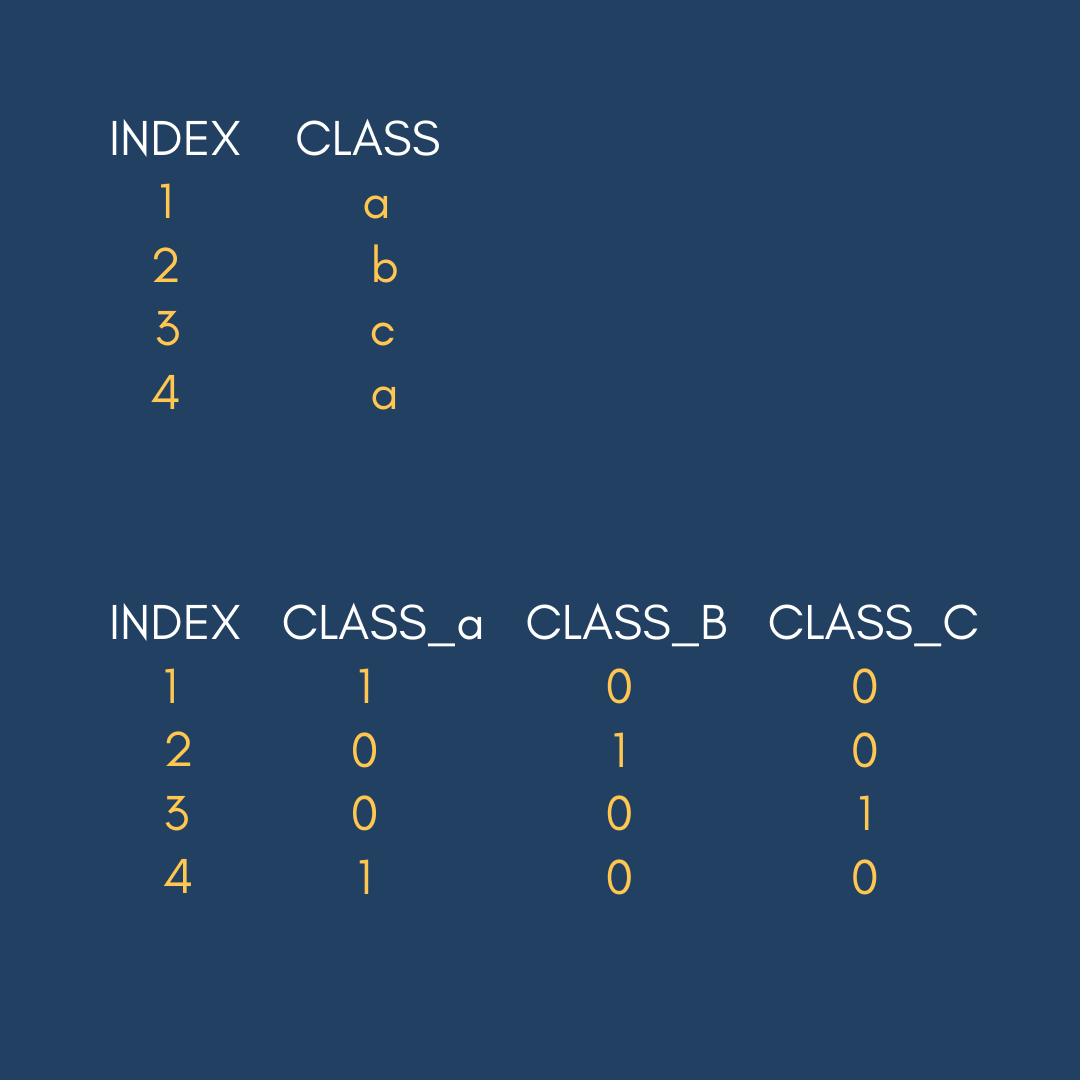



In [ ]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Scaling target variables
To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors are saved so we can go backwards when we use the network for predictions.

In [ ]:
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

### Splitting the data into training, testing, and validation sets

We'll save the data for the last approximately 21 days to use as a test set after we've trained the network. We'll use this set to make predictions and compare them with the actual number of riders.

In [ ]:
# Save the data for approximately last 21 days 
test_data = data[-21*24:]

# Now remove the test data from the data set 
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

In [ ]:
train_features, train_targets = (features), (targets)
print(train_features.shape)
print(train_targets.shape)

(16875, 56)
(16875, 3)


## Time to build the network

Below you'll build your network. We've built out the structure. You'll implement both the forward pass and backwards pass through the network. You'll also set the hyperparameters: the learning rate, the number of hidden units, and the number of training passes.

The network has two layers, a hidden layer and an output layer. The hidden layer will use the sigmoid function for activations. The output layer has only one node and is used for the regression, the output of the node is the same as the input of the node,i.e.the activation function is $f(x)=x$. A function that takes the input signal and generates an output signal, but takes into account the threshold, is called an activation function. We work through each layer of our network calculating the outputs for each neuron. All of the outputs from one layer become inputs to the neurons in the next layer. This process is called *forward propagation*.

We use the weights to propagate signals forward from one layer to the next layer in a neural network. We also use the weights to propagate the error in the output backwards which we got from the output layer back into the network to update our weights. This is called *backpropagation*.


  

We can't directly feed our data to the Recurrent Neural Network, we need to alter our input data such that at any time we are passing the past inputs to the network as well along with the current input.

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train_features, train_targets, time_steps)
X_test, y_test = create_dataset(test_features, test_targets, time_steps)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16865, 10, 56) (16865, 3)
(494, 10, 56) (494, 3)


**NOW IT'S TIME TO CODE OUR VERY FIRST NEURAL NETWORK USING TENSORFLOW**

TensorFlow is a free and open-source software library for dataflow and differentiable programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks.

In [ ]:
# IMPORT ALL THE REQUIRED LAYERS

import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Dropout, SimpleRNN
from tensorflow.keras.models import Sequential

In [ ]:
# DEFINE THE ARCHITECTURE OF THE MODEL

model = Sequential()
model.add(SimpleRNN(128, input_shape=X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(Dense(3))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 128)               23680     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 24,067
Trainable params: 24,067
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
132/132 [==============================] - 1s 10ms/step - loss: 0.4420 - mse: 0.4420
Epoch 2/20
132/132 [==============================] - 1s 10ms/step - loss: 0.2204 - mse: 0.2204
Epoch 3/20
132/132 [==============================] - 1s 10ms/step - loss: 0.1652 - mse: 0.1652
Epoch 4/20
132/132 [==============================] - 1s 10ms/step - loss: 0.1351 - mse: 0.135

In [ ]:
# START TRAINING THE MODEL
model.fit(X_train, y_train, batch_size=128, epochs=20 )

## Check out your predictions

Here, use the test data to view how well your network is modeling the data. If something is completely wrong here, make sure each step in your network is implemented correctly.

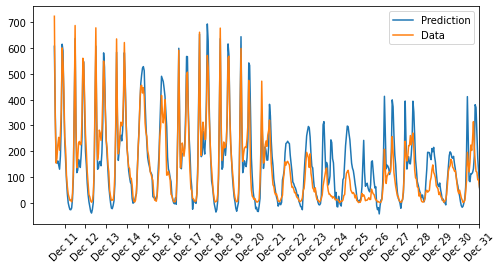

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['cnt']
predictions = model.predict(X_test).T*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((y_test[:,0]*std + mean), label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

In [ ]:
2